## Monte Carlo Model

## Using overal average and standard deviation

Monte Carlo MSE Error: 15.018231170766349
Monte Carlo RMSE Error: 3.8753362655086265
Price Mean: 163.11567078189302
Prediction Price Mean: 294.16204063766844


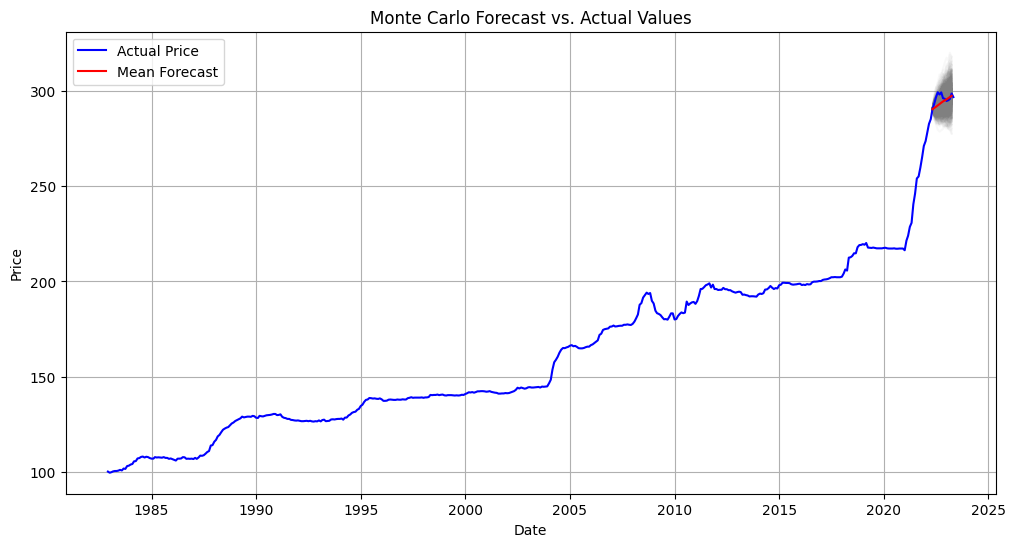

In [39]:
Path = 'Sheet_metal_mng'



import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(Path,index_col='Date',parse_dates=True)
df.index.freq = 'MS'
train = df.iloc[:-12]  # All except the last 12 rows
test = df.iloc[-12:]   # Last 12 rows for testing

# Monte Carlo Function
def monte_carlo_forecast(price_series, expected_return, volatility, num_simulations, num_periods):
    simulations = np.zeros((num_simulations, num_periods))
    simulations[:, 0] = price_series.iloc[-1]  # Start simulations from the last available price

    for i in range(num_simulations):
        for j in range(1, num_periods):
            random_num = random.gauss(0, 1)
            drift = expected_return * simulations[i, j - 1]
            shock = volatility * random_num * simulations[i, j - 1]
            simulations[i, j] = simulations[i, j - 1] + drift + shock

    forecast_dates = pd.date_range(start=price_series.index[-1], periods=num_periods, freq=price_series.index.freq)
    forecast_df = pd.DataFrame(simulations, index=range(num_simulations), columns=forecast_dates)
    
    return forecast_df

# Calculate historical returns, expected return
historical_returns = train['Price'].pct_change().dropna() #computing the percentage change in prices over each period

# Calculate average historical return
historical_avg_return = historical_returns.mean() #Calculate the average of the historical returns to determine the historical average return.

# Calculate historical volatility
historical_volatility = historical_returns.std()

# Call function
expected_return = historical_avg_return
volatility = historical_volatility
num_simulations = 1000
num_periods = 12
forecast = monte_carlo_forecast(train['Price'], expected_return, volatility, num_simulations, num_periods)

# Calculate ARIMA MSE and RMSE
MonteCarlo_mse = mean_squared_error(test['Price'], forecast.mean().values)
MonteCarlo_rmse = np.sqrt(MonteCarlo_mse)
print('Monte Carlo MSE Error:', MonteCarlo_mse)
print('Monte Carlo RMSE Error:',MonteCarlo_rmse)
print('Price Mean:',df.Price.mean())
print('Prediction Price Mean:',forecast.mean().mean())
# Plotting the forecast and actual values
plt.figure(figsize=(12, 6))
plt.plot(forecast.T, color='gray', alpha=0.05)  # Plotting all simulations
plt.plot(df.index, df['Price'], color='blue', label='Actual Price')  # Plotting actual values
plt.plot(forecast.columns, forecast.mean(), color='red', label='Mean Forecast')  # Plotting mean forecast
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monte Carlo Forecast vs. Actual Values')
plt.legend()
plt.grid()
plt.show()

In [34]:
expected_return

-0.0001753015360534824

In [35]:
volatility

0.002493193182241633

In [36]:
train['Price']

Date
2003-12-01    100.000
2004-01-01     99.800
2004-02-01     99.500
2004-03-01     99.300
2004-04-01     99.500
               ...   
2022-01-01     94.420
2022-02-01     95.108
2022-03-01     95.311
2022-04-01     95.660
2022-05-01     96.134
Freq: MS, Name: Price, Length: 222, dtype: float64

In [37]:
historical_returns = train['Price'].pct_change().dropna()
historical_monthly_volatility = historical_returns.groupby(by=[historical_returns.index.month]).std()
historical_avg_return_monthly = historical_returns.groupby(by=[historical_returns.index.month]).mean()

In [28]:
historical_returns

Date
1983-01-01   -0.006000
1983-02-01    0.003018
1983-03-01    0.004012
1983-04-01    0.001998
1983-05-01    0.000000
                ...   
2022-01-01    0.009383
2022-02-01    0.017280
2022-03-01    0.015547
2022-04-01    0.008892
2022-05-01    0.018300
Freq: MS, Name: Price, Length: 473, dtype: float64

In [29]:
historical_monthly_volatility

Date
1     0.005965
2     0.006655
3     0.007743
4     0.007255
5     0.007903
6     0.007933
7     0.005198
8     0.007703
9     0.003769
10    0.004775
11    0.006162
12    0.005617
Name: Price, dtype: float64

In [30]:
historical_avg_return_monthly

Date
1     0.000913
2     0.002171
3     0.004209
4     0.002876
5     0.004217
6     0.002420
7     0.002518
8     0.003290
9     0.000497
10    0.001032
11    0.002885
12    0.000244
Name: Price, dtype: float64

In [31]:
num_simulations = 1
num_periods = 12
expected_return = historical_avg_return_monthly[1]
volatility = historical_monthly_volatility[1]
forecast = monte_carlo_forecast(train['Price'], expected_return, volatility, num_simulations, num_periods).T
forecast[forecast.index.month==1]

,0
2023-01-01,294.49002


## Using period avg and period std

Monte Carlo MSE Error: 3.705031841912904
Monte Carlo RMSE Error: 1.9248459267985332
Price Mean: 92.04923931623934
Prediction Price Mean: 96.16383202676597


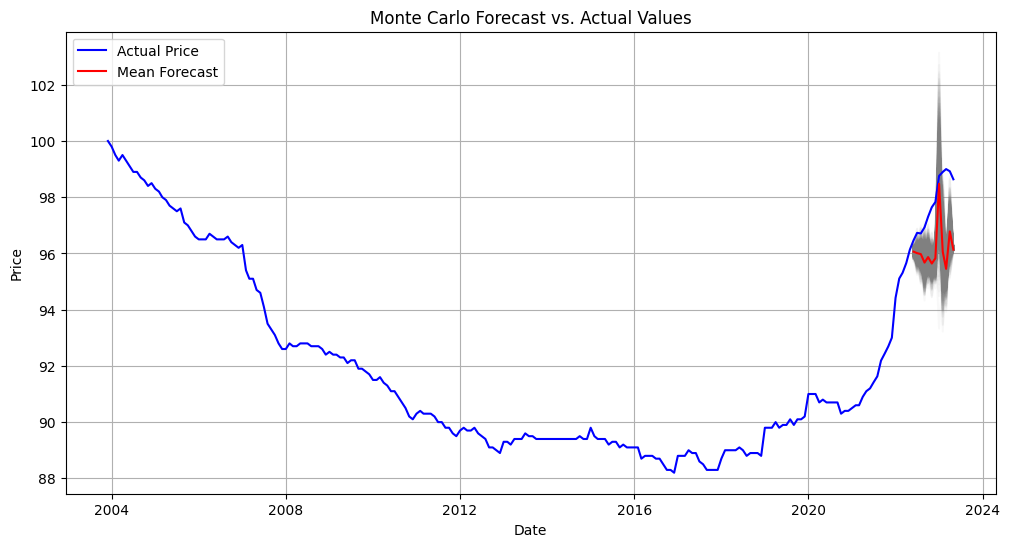

In [38]:
Path = 'Computer & Electronic Mng.csv'



import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(Path,index_col='Date',parse_dates=True)
df.index.freq = 'MS'
train = df.iloc[:-12]  # All except the last 12 rows
test = df.iloc[-12:]   # Last 12 rows for testing

# Monte Carlo Function
def monte_carlo_forecast(price_series, expected_return, volatility, num_simulations, num_periods):
    simulations = np.zeros((num_simulations, num_periods))
    simulations[:, 0] = price_series.iloc[-1]  # Start simulations from the last available price

    for i in range(num_simulations):
        for j in range(1, num_periods):
            random_num = random.gauss(0, 1)
            drift = expected_return * simulations[i, j - 1]
            shock = volatility * random_num * simulations[i, j - 1]
            simulations[i, j] = simulations[i, j - 1] + drift + shock

    forecast_dates = pd.date_range(start=price_series.index[-1], periods=num_periods, freq=price_series.index.freq)
    forecast_df = pd.DataFrame(simulations, index=range(num_simulations), columns=forecast_dates)
    
    return forecast_df

historical_returns = train['Price'].pct_change().dropna()
historical_monthly_volatility = historical_returns.groupby(by=[historical_returns.index.month]).std()
historical_avg_return_monthly = historical_returns.groupby(by=[historical_returns.index.month]).mean()

num_simulations = 1000
num_periods = 12
all_forecasts = pd.DataFrame()
for month in range(1,13):
    expected_return = historical_avg_return_monthly[month]
    volatility = historical_monthly_volatility[month]
    forecast = monte_carlo_forecast(train['Price'], expected_return, volatility, num_simulations, num_periods).T
    forecast_month =forecast[forecast.index.month==month].T
#     print(forecast_month)
    all_forecasts[month] = forecast_month
# Rename the columns with the corresponding month names (optional)
month_names = ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01','2023-05-01','2022-06-01','2022-07-01','2022-08-01','2022-09-01','2022-10-01','2022-11-01','2022-12-01']  # Replace with actual month names
all_forecasts.columns = pd.to_datetime(month_names)
# Sort columns based on datetime values
all_forecasts = all_forecasts.sort_index(axis=1)

# Calculate Monte Carlo MSE and RMSE
MonteCarlo_mse = mean_squared_error(test['Price'], all_forecasts.mean().values)
MonteCarlo_rmse = np.sqrt(MonteCarlo_mse)
print('Monte Carlo MSE Error:', MonteCarlo_mse)
print('Monte Carlo RMSE Error:',MonteCarlo_rmse)
print('Price Mean:',df.Price.mean())
print('Prediction Price Mean:',all_forecasts.mean().mean())
# Plotting the forecast and actual values
plt.figure(figsize=(12, 6))
plt.plot(all_forecasts.T, color='gray', alpha=0.05)  # Plotting all simulations
plt.plot(df.index, df['Price'], color='blue', label='Actual Price')  # Plotting actual values
plt.plot(all_forecasts.columns, all_forecasts.mean(), color='red', label='Mean Forecast')  # Plotting mean forecast
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monte Carlo Forecast vs. Actual Values')
plt.legend()
plt.grid()
plt.show()